<a href="https://colab.research.google.com/github/anubhavg2908/BDDA-Project/blob/main/GROUP_12_backorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# data location:

pathToFolder = "/gdrive/MyDrive/bdda1"

In [ ]:
path = Path(pathToFolder) / "product_train.csv"

In [ ]:
#  Load data:

df = pd.read_csv(path)

In [ ]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,No,No,No,Yes,No,No
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,No,No,No,Yes,No,No
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,No,No,No,Yes,No,No
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,No,No,No,Yes,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                250078 non-null  int64  
 1   national_inv       250078 non-null  int64  
 2   lead_time          250078 non-null  int64  
 3   in_transit_qty     250078 non-null  int64  
 4   forecast_3_month   250078 non-null  int64  
 5   forecast_6_month   250078 non-null  int64  
 6   forecast_9_month   250078 non-null  int64  
 7   sales_1_month      250078 non-null  int64  
 8   sales_3_month      250078 non-null  int64  
 9   sales_6_month      250078 non-null  int64  
 10  sales_9_month      250078 non-null  int64  
 11  min_bank           250078 non-null  int64  
 12  potential_issue    250078 non-null  object 
 13  pieces_past_due    250078 non-null  int64  
 14  perf_6_month_avg   250078 non-null  float64
 15  perf_12_month_avg  250078 non-null  float64
 16  lo

In [ ]:
df.shape

(250078, 23)

In [ ]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.500780e+05,2.500780e+05,250078.000000,250078.000000,2.500780e+05,2.500780e+05,2.500780e+05,250078.000000,2.500780e+05,2.500780e+05,2.500780e+05,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000
mean,3.445092e+06,3.530814e+02,7.831764,43.495673,1.928422e+02,3.618791e+02,5.306028e+02,54.319968,1.785464e+02,3.532202e+02,5.353359e+02,51.258775,1.746255,0.772383,0.776106,0.682995
std,7.774587e+05,5.734557e+03,6.760722,1076.528522,5.728252e+03,1.012271e+04,1.468183e+04,1562.466565,5.188470e+03,1.016469e+04,1.568775e+04,1111.366140,180.670668,0.241953,0.230465,42.306053
min,2.065611e+06,-3.034000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.984056e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.700000,0.690000,0.000000
50%,3.409472e+06,1.400000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,4.000000e+00,0.000000,0.000000,0.830000,0.830000,0.000000
75%,3.832655e+06,7.600000e+01,9.000000,0.000000,6.000000e+00,1.600000e+01,2.600000e+01,5.000000,1.600000e+01,3.300000e+01,5.000000e+01,3.000000,0.000000,0.970000,0.960000,0.000000
max,4.986449e+06,1.165770e+06,52.000000,276703.000000,1.242940e+06,2.056820e+06,3.103460e+06,358011.000000,1.094112e+06,2.123946e+06,3.182148e+06,196869.000000,54868.000000,1.000000,1.000000,12000.000000


In [ ]:
df['went_on_backorder'].value_counts()

No     248463
Yes      1615
Name: went_on_backorder, dtype: int64

In [ ]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

Text(0.5, 0, 'Number of back orders or nonback orders')

Text(0, 0.5, 'counts')

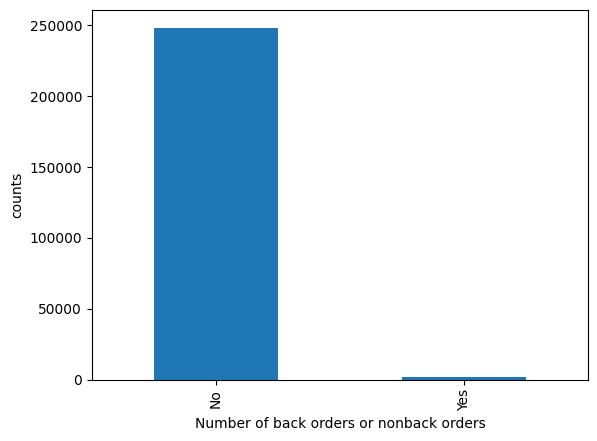

In [ ]:
#Target variable analysis
fig = df['went_on_backorder'].value_counts().plot.bar()
fig.set_xlabel('Number of back orders or nonback orders')
fig.set_ylabel('counts')

<Axes: title={'center': 'impact of lead time on backorder'}, xlabel='lead_time'>

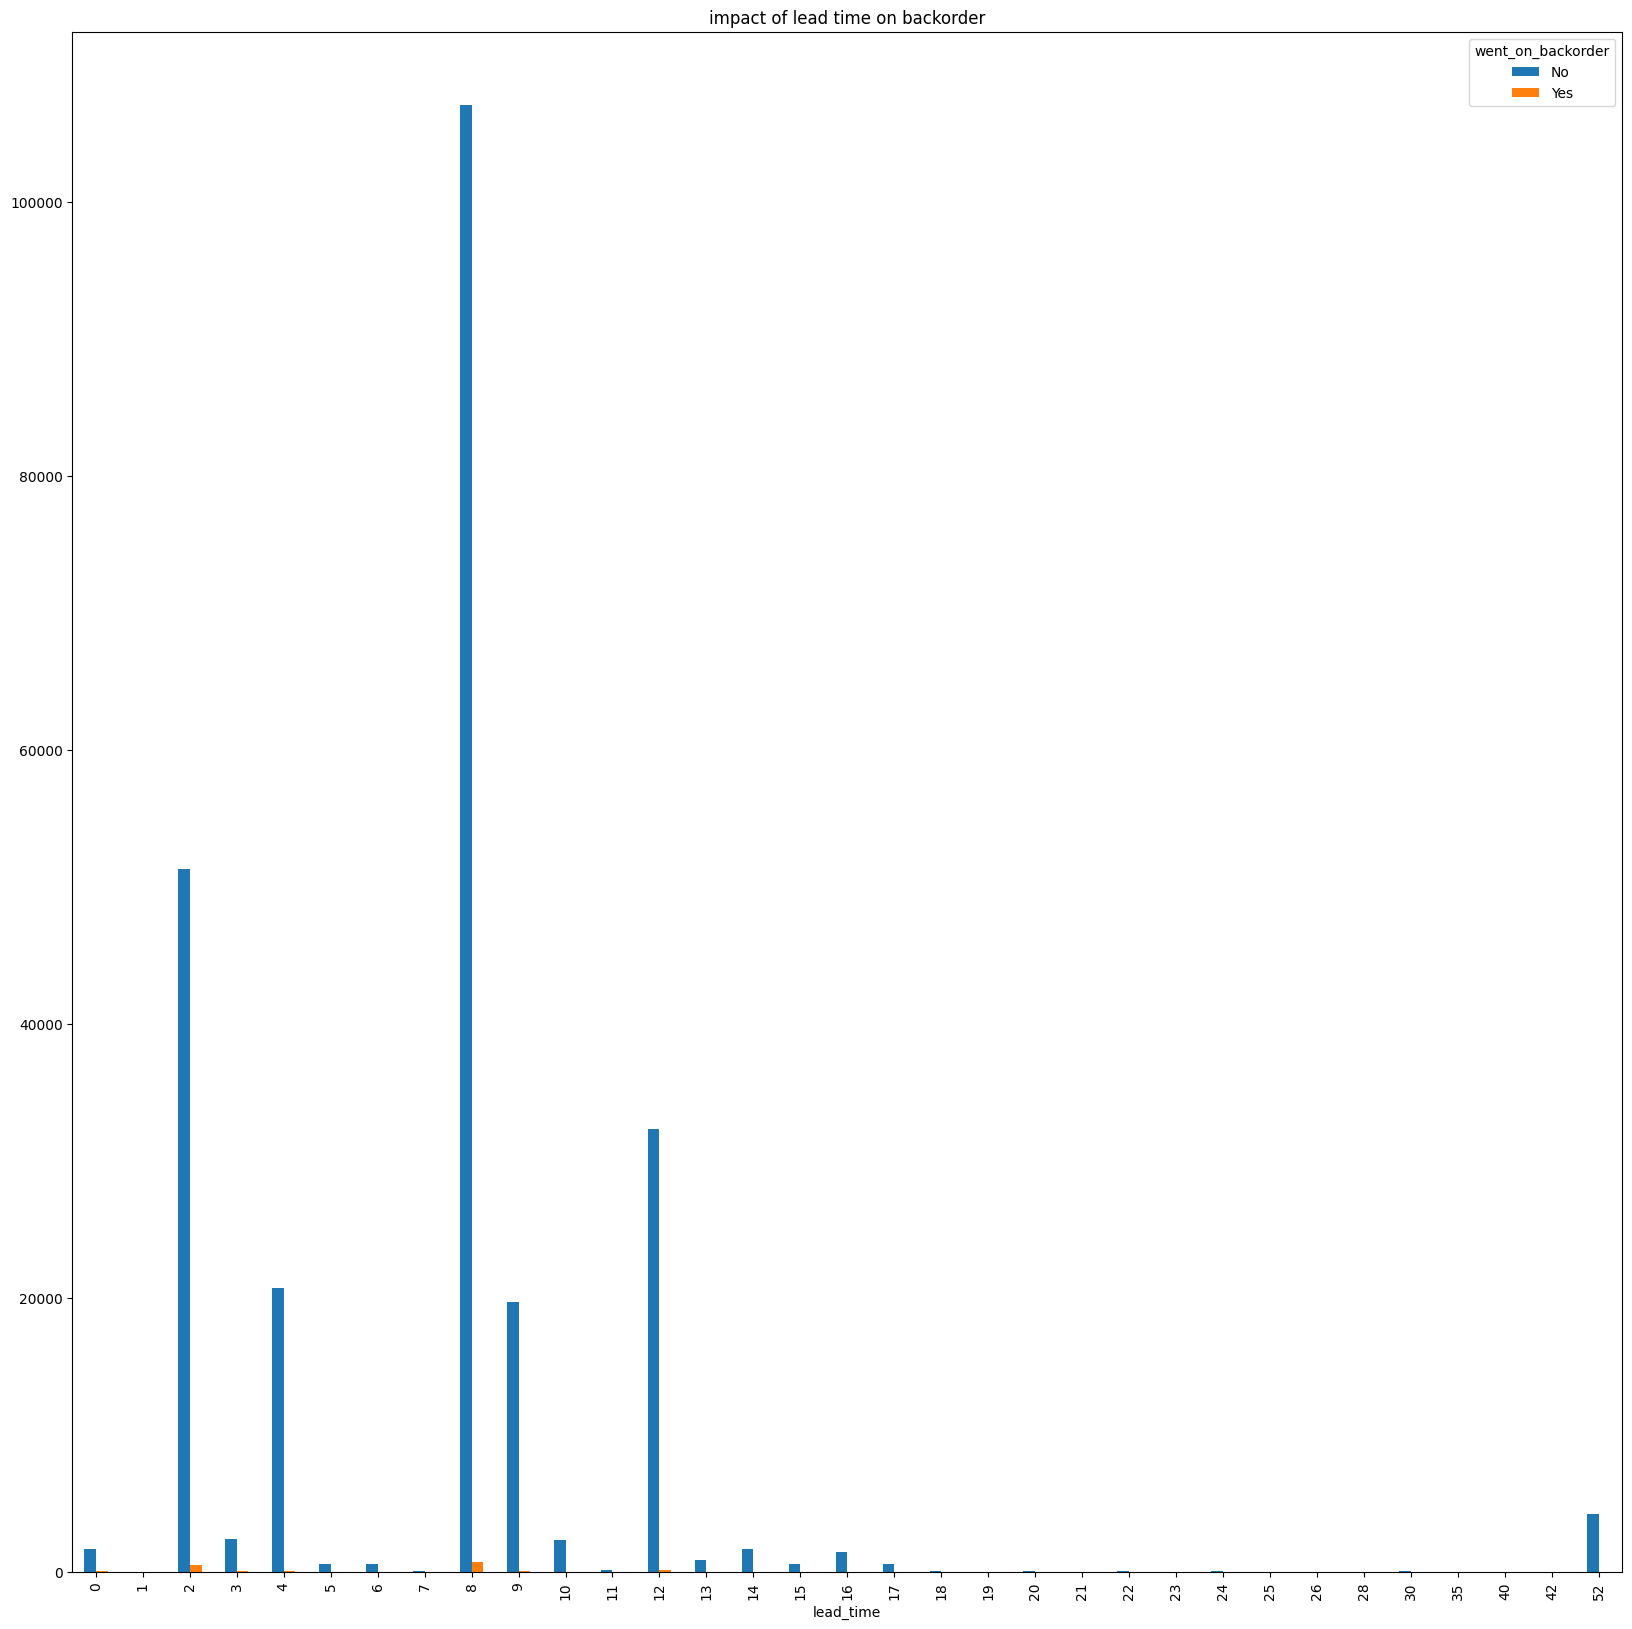

In [ ]:
#impact of lead time on backorder
pd.crosstab(df.lead_time,df.went_on_backorder).plot(kind='bar',title='impact of lead time on backorder',figsize=(20,20))

In [ ]:
#within 12 days company should deliver the product

<Axes: >

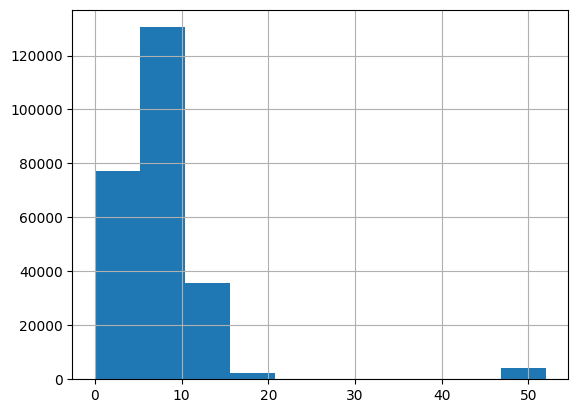

In [ ]:
df['lead_time'].hist()

In [ ]:
# Recode binary variables as (0,1) from (Yes,No)
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
    df[col]=pd.factorize(df[col])[0]

In [ ]:
#df['perf_12_month_avg'].unique()
#df['perf_6_month_avg']=df['perf_6_month_avg'].replace(-99, np.NaN)
#df['perf_12_month_avg']=df['perf_12_month_avg'].replace(-99, np.NaN)
#df.fillna(df.median(), inplace=True)

In [ ]:
# Get target
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)

In [ ]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.11983858,  0.33513535, -0.08213092, ..., -0.02863415,
         0.55548194, -0.08474171],
       [-0.03019516,  0.26380554, -1.02266489, ..., -0.01309966,
         0.07392027, -0.04489111],
       [-0.11407502, -0.17476082, -0.65518133, ..., -0.00422623,
         0.19994045, -0.06263168],
       ...,
       [-0.12111611,  0.03140588, -0.24732744, ..., -0.01466342,
         0.36983572, -0.13282636],
       [-0.0971044 , -1.21782812,  0.12651649, ...,  0.00940265,
         0.19222635, -0.07590233],
       [-0.10583018, -0.88705095,  0.00500645, ..., -0.00590006,
         0.28081643, -0.05830968]])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

Text(0.5, 1.0, 'Cumulative Explained Variance Ratio by Number of Principal Components')

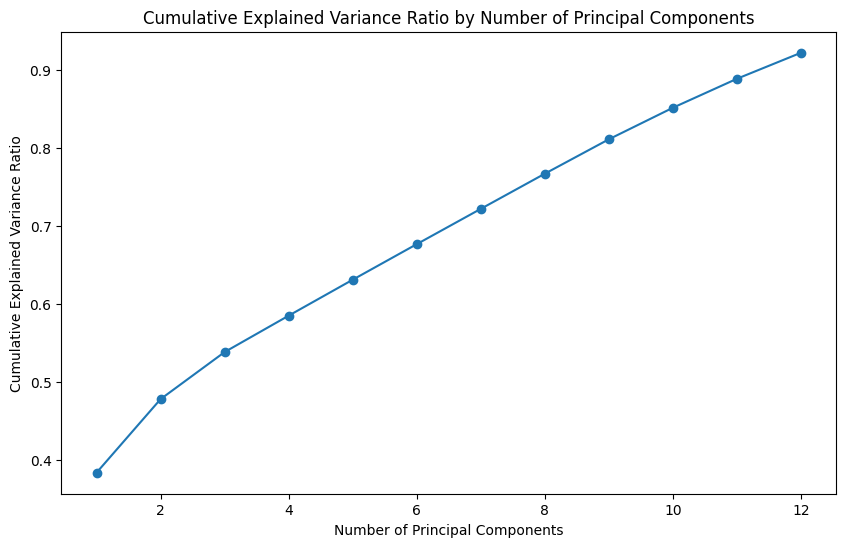

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.show()

In [ ]:
# # Divide data into training and validation subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.1, random_state = 1)

In [ ]:
pipe = make_pipeline(SimpleImputer(strategy = 'mean'), RandomForestClassifier())

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
Y_pred = pipe.predict(X_test)

In [ ]:
pipe.score(X_test,Y_test)

0.9937619961612284

In [ ]:
accu = accuracy_score(Y_test,Y_pred)
accu
#accuracy = 99.40%

0.9937619961612284

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('Random Forest Classifier accuracy: %0.3f'% accuracy_score(Y_pred, Y_test))

Random Forest Classifier accuracy: 0.994


In [ ]:
print("Random Forest Classifier report \n", classification_report(Y_pred, Y_test))

Random Forest Classifier report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     25008
           1       0.00      0.00      0.00         0

    accuracy                           0.99     25008
   macro avg       0.50      0.50      0.50     25008
weighted avg       1.00      0.99      1.00     25008



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

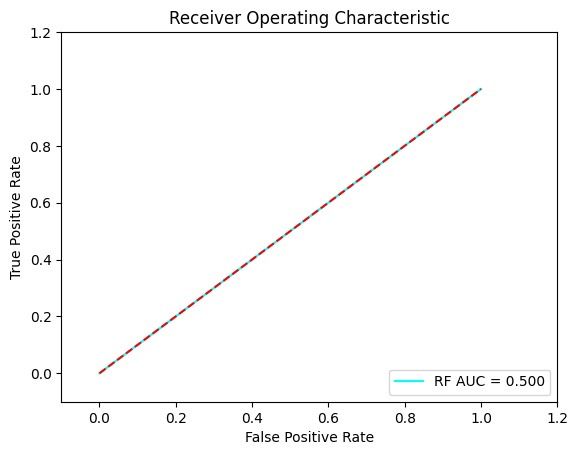

In [ ]:
roc_curve_acc(Y_test, Y_pred, "RF")